# Main Test

## Data Enigineer 
- Data shape  = (1, 가변 시계열)
- 클래스 라벨링 (= CHIP[N]_ WIRE[N]_ [Parameter]_ [Seg_N])

In [7]:
import pandas as pd
import numpy as np

def readFile(filepath):
    finalData = {}
    data = pd.read_csv(filepath)
    print(data)
    uniqueChip = data['chip'].unique()
    uniqueWire = data['wire'].unique()
    uniquePar = data['parameter'].unique()
    uniqueSeg = data['segment'].unique()

    for chip in uniqueChip:
        for wire in uniqueWire:
            for par in uniquePar:
                for seg in uniqueSeg:
                    chipFilter = data.loc[data["chip"] == chip]
                    wireFilter = chipFilter.loc[data["wire"] == wire]
                    parFilter = wireFilter.loc[data["parameter"] == par]
                    segFilter = parFilter.loc[data["segment"] == seg, "value"]
                    result = segFilter.to_numpy()
                    result = np.reshape(result,(1,len(result)))
                    label = chip + "_" + wire + "_" + par +"_" +str(seg)
                    finalData[label] = result
    return finalData
    
#AXISX_data = readFile("resources/AXISX_resample.csv")
CLAMP_data = readFile("resources/CLAMP_resample.csv")
print(CLAMP_data)
# AXISX_data CLAMP_data 합치기?

          chip    wire parameter  segment     value
0        CHIP1  WIRE10     CLAMP        1  2.236858
1        CHIP1  WIRE10     CLAMP        1  1.909297
2        CHIP1  WIRE10     CLAMP        1  1.554571
3        CHIP1  WIRE10     CLAMP        1  1.205214
4        CHIP1  WIRE10     CLAMP        1  1.132879
...        ...     ...       ...      ...       ...
480063  CHIP10   WIRE9     CLAMP        6  2.349941
480064  CHIP10   WIRE9     CLAMP        6  2.346782
480065  CHIP10   WIRE9     CLAMP        6  2.347098
480066  CHIP10   WIRE9     CLAMP        6  2.366051
480067  CHIP10   WIRE9     CLAMP        6  2.546415

[480068 rows x 5 columns]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Convert Graph to Image Using RP
- Data shape (28, 28, 1)
- 10 * 19 * 13개의 데이터 

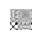

In [52]:
# Show the results for the first time series
width = 28
height = 28
my_dpi = 96
plt.figure(figsize=(width/my_dpi, height/my_dpi), dpi=my_dpi)
plt.axis('off')

PATH = "resources/imgs/"

for key, values in tempDict.items():
    values_rp = rp.fit_transform(values)
    
    plt.imshow(values_rp[0], cmap='binary', origin='lower')
    
    classDir = key.split("_")[2] + key.split("_")[3] + "/"
    
    try:
        if not os.path.exists(PATH + classDir):
            os.makedirs(PATH + classDir)
    except OSError:
        print ('Error: Creating directory. ' +  PATH + classDir)
    
    filename = PATH + classDir + key + '.png'
    if not os.path.exists(filename):
        plt.savefig(filename, dpi=my_dpi,  bbox_inches='tight', pad_inches=0.0)
    

190
380
570
760
950
1140


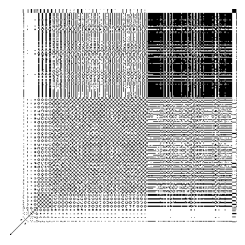

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlots
import os

def makeRPImgFiles(dirPath, dicDatas, width=28, height=28, dpi=96, ):
    # Recurrence plot transformation
    rp = RecurrencePlots(dimension=1,epsilon='percentage_points', percentage=30)
    
    
    plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    plt.axis('off')
    i=0
    for key, values in dicDatas.items():
        i += 1
        if i%190 == 0:
            print(i)
        # 디렉토리 생성
        classDir = key.split("_")[2] + key.split("_")[3] + "/"
        try:
            if not os.path.exists(dirPath + classDir):
                os.makedirs(PATH + classDir)
        except OSError:
            print ('Error: Creating directory. ' +  PATH + classDir)
        
        # 파일 존재 여부 확인 
        ## 파일 존재하면 넘어감 
        filename = '%s%s%s.png' %(PATH, classDir, key)
        if os.path.exists(filename):
            continue
        
        # RP 변환 및 이미지 파일 생성 저장
        values_rp = rp.fit_transform(values)
        plt.imshow(values_rp[0], cmap='binary', origin='lower')

        plt.savefig(filename, dpi=dpi,  bbox_inches='tight', pad_inches=0.0)

width = 300
height = 300
my_dpi = 96
PATH = "resources/imgs300x300/"

#makeRPImgFiles(PATH, AXISX_data, width, height, my_dpi)
makeRPImgFiles(PATH, CLAMP_data, width, height, my_dpi)